In [1]:
#Analise do arquivo Churn
#Importando bibliotecas
import pandas as pd
import statistics as sts
import plotly.express as px
import seaborn as srn

In [ ]:
#importando e dados 
arquivo = "C:/Users/Papai/Google Drive/5.Projetos/BaseDeDados/Churn.csv"
dfchurm = pd.read_csv(arquivo, sep=";")
print(dfchurm)
#dfchurn.head()
#dfchurn.shape

In [3]:
#INICIANDO ANALISE EXPLORATORIA
##ALTERANDO NOMENCLATURA DA COLUNAS
dfchurm.columns = ["Id", "Score", "Estado", "Genero", "Idade", "Patrimonio", "Saldo", "Produto",
                        "PossuiCartaoCredito", "Ativo", "Salario", "Saiu"]
dfchurm.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produto,PossuiCartaoCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


<AxesSubplot: xlabel='Estado'>

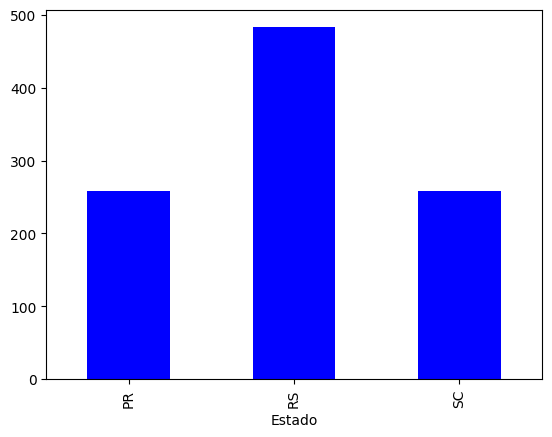

In [7]:
estados = dfchurm.groupby(["Estado"]).size()
estados
estados.plot.bar(color = 'blue')


In [5]:
#VERIFICO CAMPOS VAZIOS
dfchurm["Estado"].isnull().sum()

0

In [6]:
#CORRIGINDO ERROS (REGRAS DE NEGOCIO OU DE DIGITAÇÃO)
dfchurm.loc[dfchurm["Estado"] == "RP", "Estado"] = "PR"
#
dfchurm.loc[dfchurm["Estado"].isin(["SP", "TD"]), "Estado" ] = "RS"

#GENERO
##ANALISE DOS DADOS

<AxesSubplot: xlabel='Genero'>

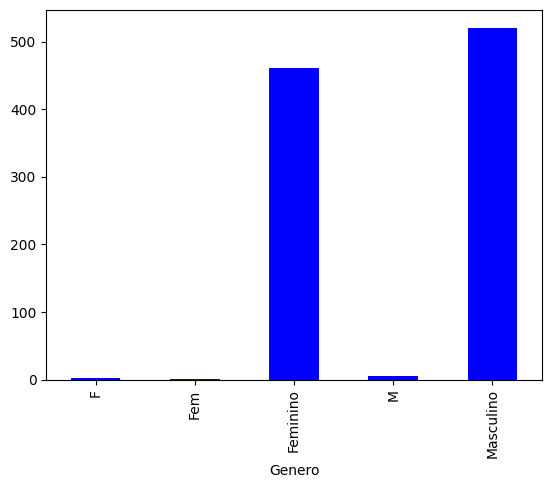

In [8]:
genero = dfchurm.groupby(["Genero"]).size()
genero
genero.plot.bar(color = 'blue')

#CORREÇÃO
#'Feminino', 'Masculino', 'M', nan, 'F', 'Fem'

In [25]:
#dfchurm["Genero"].unique()
dfchurm["Genero"].isnull().sum()

0

In [10]:
dfchurm["Genero"].fillna('Masculino', inplace = True)
#dfchurm["Genero"].isnull().sum()
dfchurm.loc[dfchurm["Genero"] == "M", "Genero"] = "Masculino"
dfchurm.loc[dfchurm["Genero"].isin(["Fem", "F"]), "Genero" ] = "Feminino"


In [26]:
#verifico a correção
genero = dfchurm.groupby(["Genero"]).size()
genero

Genero
Feminino     464
Masculino    535
dtype: int64

In [ ]:
#EXPLORAÇÃO NUMERICAS
dfchurm["Score"].describe()

Text(0.5, 1.0, 'Score')

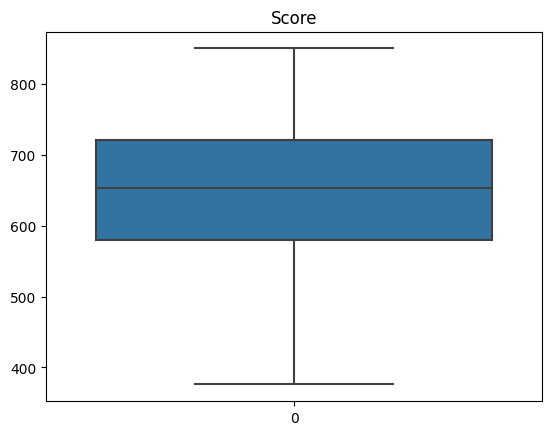

In [27]:
srn.boxplot(dfchurm["Score"]).set_title("Score")


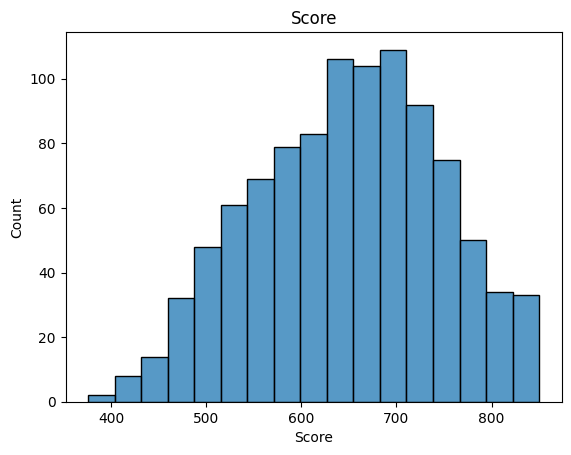

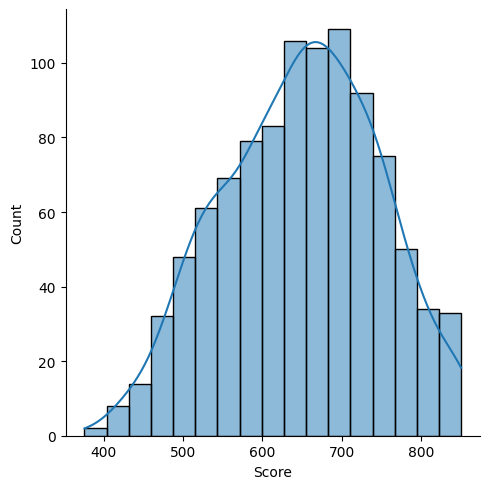

In [28]:
srn.histplot(dfchurm['Score']).set_title('Score')

srn.displot(data=dfchurm, x= "Score", kde=True)

In [94]:
#IDADE
#Analise Idade
dfchurm["Idade"].describe()

count    999.000000
mean      38.903904
std       10.672421
min        0.000000
25%       32.000000
50%       37.000000
75%       44.000000
max       82.000000
Name: Idade, dtype: float64

In [14]:
medianaIdade = sts.median(dfchurm["Idade"])
dfchurm.loc[(dfchurm["Idade"]) < 0, "Idade"] = medianaIdade
dfchurm.loc[(dfchurm["Idade"]) > 120, "Idade"] = medianaIdade

Text(0.5, 1.0, 'Idade')

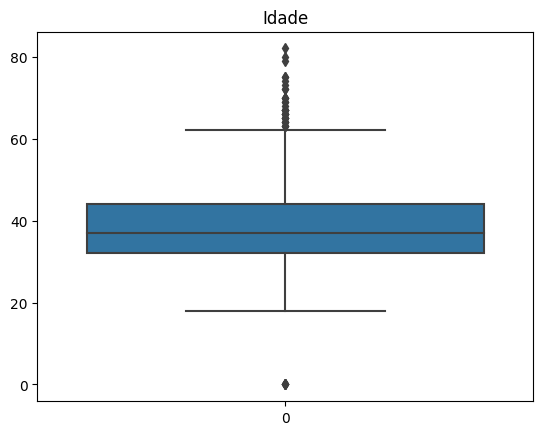

In [15]:
srn.boxplot(dfchurm["Idade"]).set_title("Idade")

In [19]:
import plotly.express as px
idade = dfchurm["Idade"]
df = px.data.tips()
fig = px.box(df, y=idade, points="all")
fig.show()

#import plotly.express as px
##df = px.data.tips()
#fig = px.box(df,  y=idade, points="all")
#fig.show()

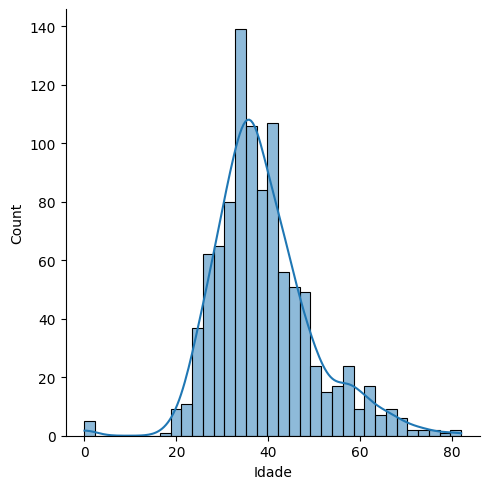

In [20]:
#srn.histplot(dfchurm['Idade']).set_title('Idade')

srn.displot(data=dfchurm, x= "Idade", kde=True)

In [31]:
import plotly.figure_factory as ff
import numpy as np
#np.random.seed(1)

#x = np.random.randn(1000)
x=dfchurm['Idade']
hist_data = [x]
group_labels = ['Idade'] # name of the dataset #LEGENDA

fig = ff.create_distplot(hist_data, group_labels, curve_type= "kde")
fig.show()

In [34]:
dfchurm["Saldo"].describe()
 


count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Saldo, dtype: float64

In [ ]:
srn.displot(data=dfchurm, x= "Saldo", kde=True)

In [45]:
#campos nulos
dfchurm.isnull().sum()

Id                     0
Score                  0
Estado                 0
Genero                 8
Idade                  0
Patrimonio             0
Saldo                  0
Produto                0
PossuiCartaoCredito    0
Ativo                  0
Salario                0
Saiu                   0
dtype: int64

Tratamento do campo salario Nans

In [43]:
medianaSalario = sts.median(dfchurm["Salario"])
medianaSalario
dfchurm["Salario"].fillna(medianaSalario, inplace = True)
dfchurm["Salario"].isnull().sum()

70518.0

In [46]:
dfchurm["Salario"].isnull().sum()

0

In [65]:
from plotly.figure_factory import create_distplot
hist_data = [dfchurm["Idade"]] #Use list of lists to plot multiple data sets on the same plot
group_labels = ['Idade'] #Names for each data set
bin_size = 1 #Size of histogram bins. Default = 1
curve_type = "normal" #‘kde’ or ‘normal’. Default = ‘kde’
show_rug=True #Add rug to distplot? Default = True
#colors = ['#333F44']
#show_curve = True #Add curve to distplot? Default = True
# histnorm ((str)) – ‘probability density’ or ‘probability’ Default = ‘probability density’
# show_hist ((bool)) – Add histogram to distplot? Default = True
# show_rug ((bool)) – Add rug to distplot? Default = True
# colors ((list[str])) – Colors for traces.
# rug_text ((list[list])) – Hovertext values for rug_plot,
fig = create_distplot(hist_data, group_labels,show_rug=show_rug, curve_type =curve_type ,bin_size=bin_size)
# Add title
fig.update_layout(title_text='Tit.: Idade')
fig.show()